In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_step_idx(series_list, labels=None, title="step vs idx"):
    """
    series_list: list of dict-lists.
        Each element is like: [{"step": int, "idx": int}, ...]
    labels: optional list of names (same length as series_list)
    """
    if labels is None:
        labels = [f"series_{i}" for i in range(len(series_list))]

    plt.figure(figsize=(10, 5))

    for series, name in zip(series_list, labels):
        # Extract and sort by step
        steps = np.array([d["step"] for d in series], dtype=np.int64)
        idxs  = np.array([d["idx"]  for d in series], dtype=np.float64)

        order = np.argsort(steps)
        steps = steps[order]
        idxs  = idxs[order]

        # Plot curved line (just connecting points) + optional markers
        plt.plot(steps, idxs, linewidth=2, label=name)
        # plt.scatter(steps, idxs, s=10)  # uncomment if you want markers

        # Linear fit + R^2 (to quantify "linear relationship")
        if len(steps) >= 2 and np.ptp(steps) > 0:
            m, b = np.polyfit(steps, idxs, deg=1)
            pred = m * steps + b
            ss_res = np.sum((idxs - pred) ** 2)
            ss_tot = np.sum((idxs - np.mean(idxs)) ** 2)
            r2 = 1.0 - ss_res / ss_tot if ss_tot > 0 else float("nan")
            print(f"{name}: slope={m:.6f}, intercept={b:.3f}, R^2={r2:.6f}")

            # Optional: overlay the fitted line (dashed)
            # plt.plot(steps, pred, linestyle="--", linewidth=1)

    plt.xlim(0, 127)
    plt.ylim(64, 191)
    plt.xlabel("step")
    plt.ylabel("idx")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [22]:
import os
from datasets import Dataset
from collections import defaultdict

folder_base = 'kv_states_20260219'
dict_line_logs = defaultdict(list)

for name_file in os.listdir(folder_base):
    if name_file[0] == '.':
        continue
    # end

    path_file = os.path.join(folder_base, name_file)
    ds = Dataset.load_from_disk(path_file)

    for step, item in enumerate(list(ds['idx_token'])):
        dict_log = {}
        dict_log['step'] = step
        dict_log['idx'] = item[0]
        dict_line_logs[name_file.split('.')[0]].append(dict_log)
    # end
# end

In [29]:
list_lines_illustrate_32 = [dict_line_logs[key] for key in dict_line_logs.keys() if key.split('-')[-1] == '32']
list_lines_illustrate_64 = [dict_line_logs[key] for key in dict_line_logs.keys() if key.split('-')[-1] == '64']
list_lines_illustrate_128 = [dict_line_logs[key] for key in dict_line_logs.keys() if key.split('-')[-1] == '128']

series_0: slope=0.974575, intercept=65.614, R^2=0.949797
series_1: slope=0.971960, intercept=65.781, R^2=0.944707
series_2: slope=0.958621, intercept=66.628, R^2=0.918955
series_3: slope=0.963428, intercept=66.322, R^2=0.928194
series_4: slope=0.968412, intercept=66.006, R^2=0.937823
series_5: slope=0.972161, intercept=65.768, R^2=0.945096
series_6: slope=0.950999, intercept=67.112, R^2=0.904399
series_7: slope=0.982678, intercept=65.100, R^2=0.965657
series_8: slope=0.964092, intercept=66.280, R^2=0.929473
series_9: slope=0.974146, intercept=65.642, R^2=0.948961


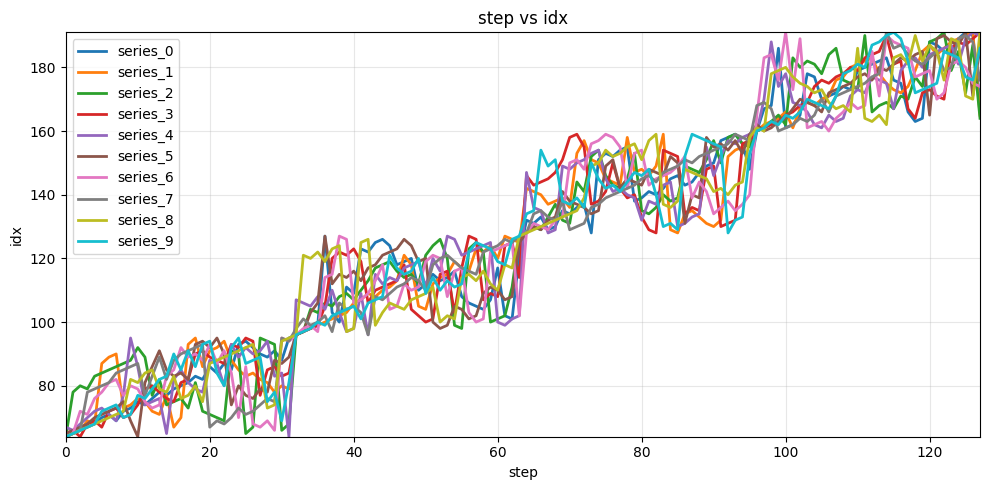

In [66]:
plot_step_idx(list_lines_illustrate_32)